# Portfolio Project: Supermarket Sales Analysis

- Exploratory Data Analysis of Supermarket Sales 
- Source: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales?resource=download
- Language: Python (pandas, numpy, plotly)

---
### Summary
Using Python-based data analysis, this project explores business questions such as pricing variations, customer spending habits, and the impact of several factors on supermarket sales (e.g., memership, time of day, payment method).

### Research Questions
- What is the distribution of prices for products across different supercenter branches?
- How do food and beverage prices vary by time of day at different branches?
- What is the relationship between customer payment method and the total price spent on food and beverages?
- How does the total price (including tax) of food and beverages correlate with customer ratings of their shopping experience?
- Is there any significant difference in the total spending on food and beverages between members and non-members?
- What is the average gross margin percentage and gross income for food and beverages compared to other product categories?
- How does the quantity of food and beverages purchased vary with customer rating and payment method?
- What is the total food and beverage revenue for each branch and customer type?
---

### Data Preprocessing

Import Packages

In [231]:
import pandas as pd
import numpy as np
import plotly.express as px

Read in Data

In [232]:
sales = pd.read_csv("Desktop/python/portfolio/supermarket_sales.csv")
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Clean Variable Names

In [261]:
## Some functions in python do not allow for space between variable names
sales = sales.rename(columns={"Product line" : "Product_line", "Unit price" : "Unit_price", "Customer type" : "Customer_type", 
                            "gross income" : "gross_income"})
sales.head()

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross_margin%,gross_income,Rating,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10


---
### Research Questions

Q1: What is the distribution of prices for products across different supercenter branches?

In [78]:
## Distribution of price across branches

description = sales["Unit_price"].groupby(sales["Branch"])
description.describe()

,count,mean,std,min,25%,50%,75%,max
Branch,,,,,,,,
A,340.0,54.780853,26.132127,10.08,32.2500,53.235,75.0950,99.83
B,332.0,55.659277,26.224559,10.59,33.3000,54.850,77.0025,99.96
C,328.0,56.609024,27.179799,10.16,33.7675,56.810,81.5525,99.96


In [234]:
## Distribution of price across branches and product lines

description2 = sales.groupby(["Branch", "Product_line"])["Unit_price"]
description2.describe()

count       mean        std    min      25%  \
Branch Product_line                                                          
A      Electronic accessories   60.0  54.871167  27.032224  10.56  27.9575   
       Fashion accessories      51.0  56.670392  26.846455  12.09  33.8850   
       Food and beverages       58.0  54.974483  25.559409  10.13  35.3700   
       Health and beauty        47.0  49.862340  26.685559  10.08  25.2150   
       Home and lifestyle       65.0  55.845692  24.663997  11.43  34.4200   
       Sports and travel        59.0  55.610339  26.905330  12.34  32.7550   
B      Electronic accessories   55.0  49.854182  26.610885  10.59  25.8850   
       Fashion accessories      62.0  54.843871  25.293453  14.48  33.8975   
       Food and beverages       50.0  55.540000  25.060549  17.63  32.5425   
       Health and beauty        53.0  58.185660  26.273331  10.75  39.0100   
       Home and lifestyle       50.0  55.514000  27.980643  11.28  33.7450   
       Sports and travel        62.0  59.678065  26.272699  11.85  37.0950   
C      Electronic accessories   55.0  55.809455  26.674616  11.81  30.4250   
       Fashion accessories      65.0  59.736000  27.957869  10.18  37.5500   
       Food and beverages       66.0  57.273030  28.066549  14.87  34.4575   
       Health and beauty        52.0  55.971346  25.967660  10.16  34.1850   
       Home and lifestyle       45.0  54.334222  26.901965  10.53  35.4700   
       Sports and travel        45.0  55.107333  28.053856  10.17  29.2200   

                                  50%      75%    max  
Branch Product_line                                    
A      Electronic accessories  54.860  74.7000  99.56  
       Fashion accessories     53.650  79.9200  99.10  
       Food and beverages      52.545  74.6050  99.78  
       Health and beauty       51.710  69.4700  99.83  
       Home and lifestyle      58.070  74.0700  97.94  
       Sports and travel       58.910  77.8450  98.40  
B      Electronic accessories  45.710  75.1500  99.73  
       Fashion accessories     54.045  73.7450  99.89  
       Food and beverages      56.090  76.5500  99.69  
       Health and beauty       62.000  76.9000  99.71  
       Home and lifestyle      50.675  80.9500  99.92  
       Sports and travel       61.570  82.8175  99.96  
C      Electronic accessories  56.130  82.1550  99.69  
       Fashion accessories     60.740  83.3500  99.82  
       Food and beverages      52.510  86.5325  99.79  
       Health and beauty       58.635  81.2475  99.96  
       Home and lifestyle      55.730  78.3800  97.50  
       Sports and travel       57.120  80.9300  99.24

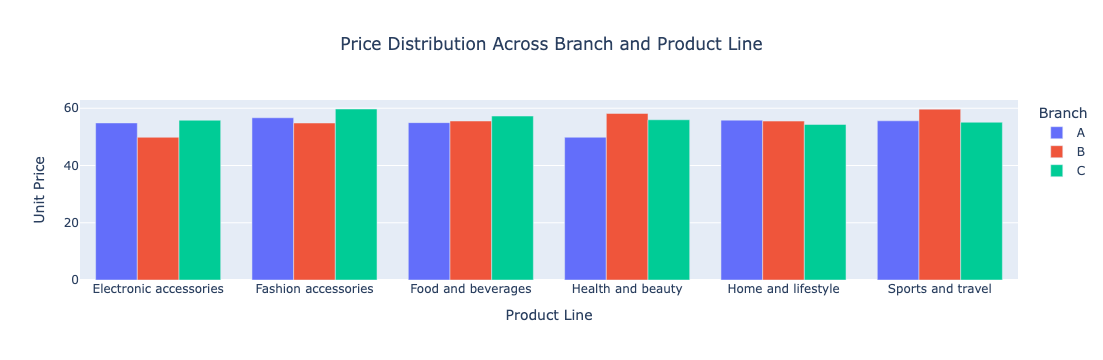

In [240]:
## Visualise price distributions across branch and product line

mean_sales = sales.groupby(["Branch", "Product_line"], as_index=False)["Unit_price"].mean()

fig = px.bar(mean_sales, x=mean_sales.Product_line, y=mean_sales.Unit_price, color="Branch", barmode="group", labels={
    "Unit_price" : "Unit Price", "Product_line" : "Product Line"}, title="Price Distribution Across Branch and Product Line")
fig.update_layout(title_x=0.5)
fig.show()

Q2: How do food and beverage prices vary by time of day at different branches?

In [241]:
## Slice hour data before grouping price data by hour 

sales["Hour"] = sales["Time"].str.split(":").str[0]

times = sales.groupby(["Hour", "Product_line", "Branch"], as_index=False)["Unit_price"].mean()
times

,Hour,Product_line,Branch,Unit_price
0,10,Electronic accessories,A,42.507778
1,10,Electronic accessories,B,56.097500
2,10,Electronic accessories,C,49.647500
3,10,Fashion accessories,A,79.323333
4,10,Fashion accessories,B,52.607500
...,...,...,...,...
191,20,Home and lifestyle,A,58.070000
192,20,Home and lifestyle,B,47.380000
193,20,Home and lifestyle,C,57.481667
194,20,Sports and travel,A,60.433333


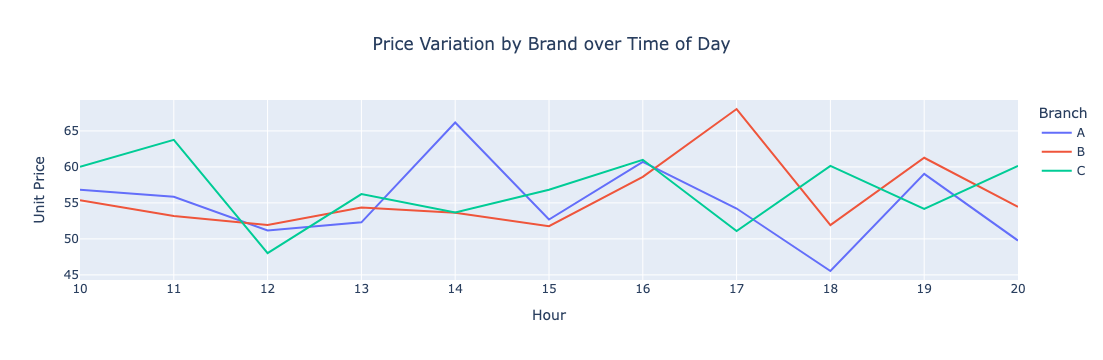

In [247]:
## Visualise price variation over time of day

times_branch = sales.groupby(["Hour", "Branch"], as_index=False)["Unit_price"].mean()

fig2 = px.line(times_branch, x="Hour", y="Unit_price", color="Branch", labels={
    "Unit_price" : "Unit Price"}, title="Price Variation by Brand over Time of Day")
fig2.update_layout(title_x=0.5)
fig2.show()

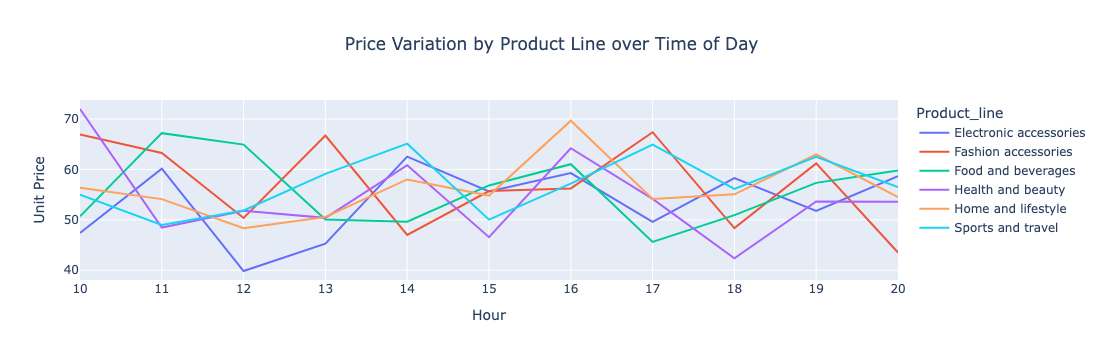

In [248]:
## Visualise product line prices over time of day

times_prod = sales.groupby(["Hour", "Product_line"], as_index=False)["Unit_price"].mean()

fig2B = px.line(times_prod, x="Hour", y="Unit_price", color="Product_line", labels={
    "Unit_price" : "Unit Price"}, title="Price Variation by Product Line over Time of Day")
fig2B.update_layout(title_x=0.5)
fig2B.show()

Q3: What is the relationship between customer payment method (Cash, Credit card, Ewallet) and the total price spent on food and beverages?

In [250]:
## Group total prices of food and beverages by payment method 

method = sales[["Product_line", "Payment", "Unit_price"]]
method = method[method["Product_line"] == "Food and beverages"]
method = method.groupby(["Payment"], as_index=False)["Unit_price"]
method = method.sum()
method

,Payment,Unit_price
0,Cash,3468.91
1,Credit card,3329.24
2,Ewallet,2947.39


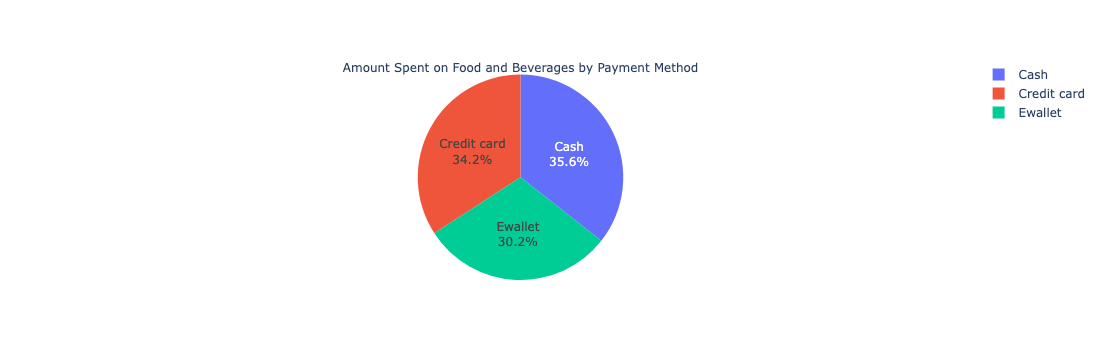

In [251]:
## Visualise share of total price spent on food and beverages by payment method

fig3 = px.pie (method, values="Unit_price", names="Payment")
fig3.update_traces(textposition="inside", textinfo="percent+label", title="Amount Spent on Food and Beverages by Payment Method")
fig3.show()

Q4: How does the total price (including tax) of food and beverages correlate with customer ratings of their shopping experience?

In [170]:
## Isolate total price and customer rating

experience = sales[["Product_line", "Total", "Rating"]]
experience.head()

,Product_line,Total,Rating
0,Health and beauty,548.9715,9.1
1,Electronic accessories,80.2200,9.6
2,Home and lifestyle,340.5255,7.4
3,Health and beauty,489.0480,8.4
4,Sports and travel,634.3785,5.3


The R2 value is 0.0001476851975461546, so we can infer there is little correlation between product expenditure and customer rating.


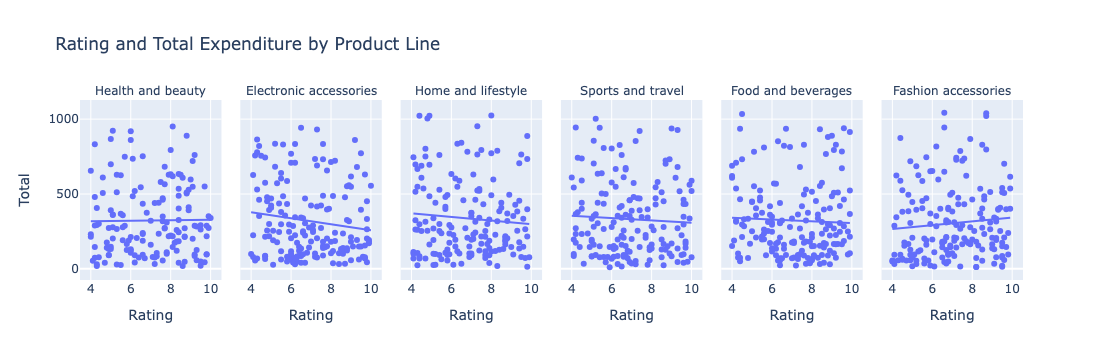

In [253]:
## Visusalise correlation of total price and customer rating

fig4 = px.scatter(experience, x="Rating", y="Total", facet_col="Product_line", trendline="ols",
                  title="Rating and Total Expenditure by Product Line")
fig4.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
r2 = px.get_trendline_results(fig4).px_fit_results.iloc[0].rsquared
print(f"The R2 value is {r2}, so we can infer there is little correlation between product expenditure and customer rating.")
fig4.show()

Q5: Is there any significant difference in the total spending on food and beverages between members and non-members (customer type)?

In [254]:
## Compare member vs non-member spending across product lines

membership = sales[["Product_line", "Total", "Customer_type"]]
membership = membership.groupby(["Customer_type", "Product_line"], as_index=False)["Total"]
membership = membership.sum()
membership.head()

,Customer_type,Product_line,Total
0,Member,Electronic accessories,24498.4950
1,Member,Fashion accessories,26323.9620
2,Member,Food and beverages,31357.6200
3,Member,Health and beauty,25831.0395
4,Member,Home and lifestyle,27978.0270


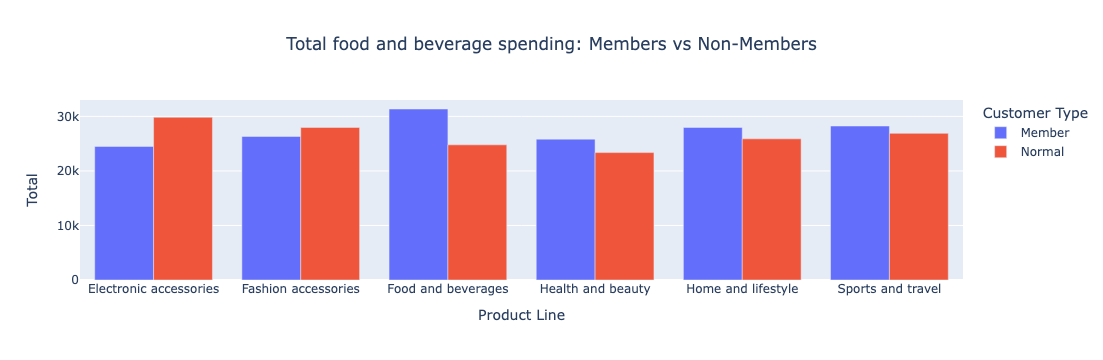

In [256]:
## Visualise member vs non-member total spending for food and beverages for each product line

fig5 = px.bar(membership, x="Product_line", y="Total", color="Customer_type", barmode="group", labels={
    "Product_line" : "Product Line", "Customer_type" : "Customer Type"}, title = "Total food and beverage spending: Members vs Non-Members")
fig5.update_layout(title_x=0.5)
fig5.show()

Q6: What is the average gross income for food and beverages compared to other product categories?

In [262]:
## Group gross income by product lines

gross = sales[["Product_line", "gross_income"]]
gross = gross.groupby(["Product_line"], as_index=False)[["gross_income"]].mean().sort_values("gross_income", ascending=False)
gross

,Product_line,gross_income
4,Home and lifestyle,16.030331
5,Sports and travel,15.812630
3,Health and beauty,15.411572
2,Food and beverages,15.365310
0,Electronic accessories,15.220597
1,Fashion accessories,14.528062


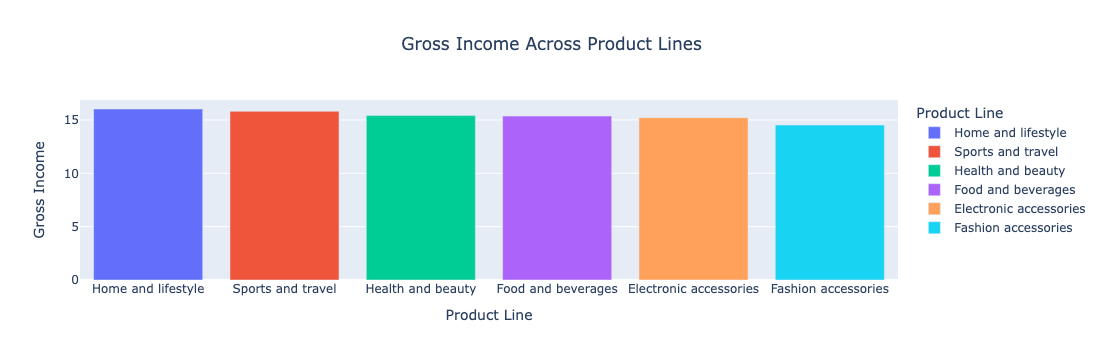

In [263]:
## Visualise gross income across product lines

fig6 = px.bar(gross, x="Product_line", y="gross_income", color="Product_line", labels={
    "Product_line" : "Product Line", "gross_income" : "Gross Income"}, title = "Gross Income Across Product Lines")
fig6.update_layout(title_x=0.5)
fig6.show()

Q7: How does the quantity of food and beverages purchased vary with customer rating and payment method?

In [266]:
## Relationships between quantity and rating, and between quantity and payment method

quantity = sales[["Product_line", "Quantity", "Rating", "Payment"]]
quantity = quantity[quantity["Product_line"] == "Food and beverages"]

quantity_rating = quantity.groupby(["Quantity"], as_index=False)["Rating"].mean()
print(quantity_rating.head())
quantity_payment = quantity.groupby(["Payment"], as_index=False)["Quantity"].sum()
print(quantity_payment.head())

   Quantity    Rating
0         1  7.273333
1         2  7.112500
2         3  7.195652
3         4  7.322222
4         5  7.400000
       Payment  Quantity
0         Cash       295
1  Credit card       335
2      Ewallet       322


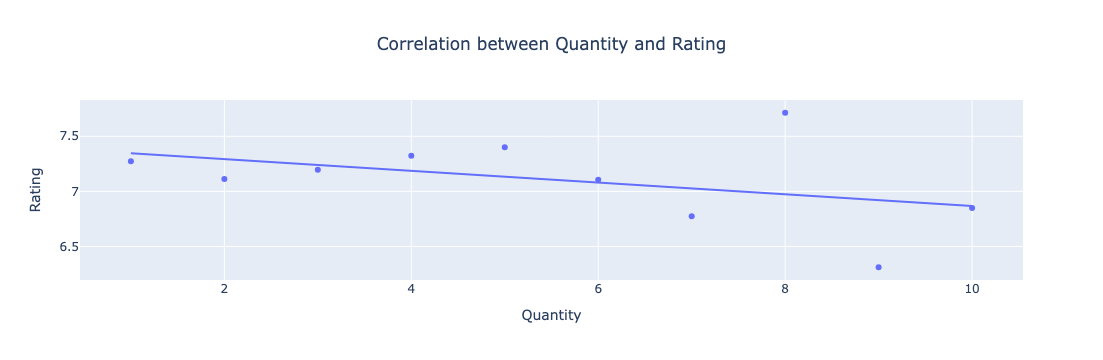

In [269]:
#Visualise correlation between quantity and rating

fig7 = px.scatter(quantity_rating, x="Quantity", y="Rating", trendline="ols", title = "Correlation between Quantity and Rating")
fig7.update_layout(title_x=0.5)
fig7.show()

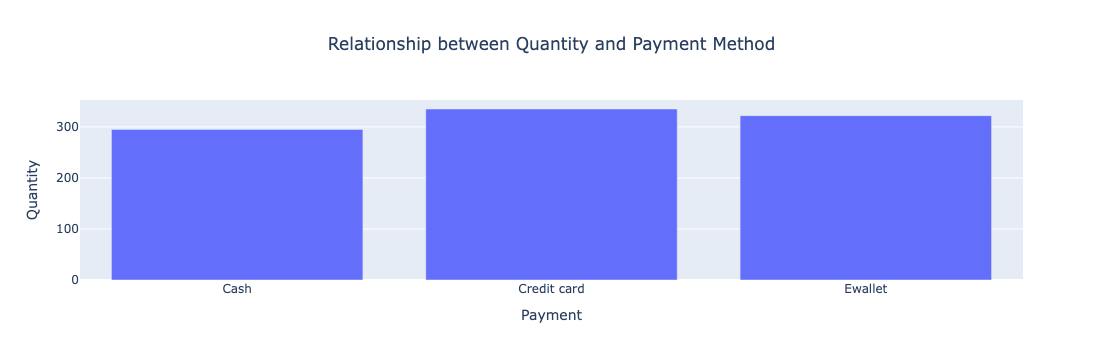

In [270]:
#Visualise relationship between quantity and payment method (quantitative x qualitative)

fig7 = px.bar(quantity_payment, x="Payment", y="Quantity", title = "Relationship between Quantity and Payment Method")
fig7.update_layout(title_x=0.5)
fig7.show()

Q8: What is the total food and beverage revenue for each branch and customer type?

In [271]:
## Group revenue for branch and customer type

revenue = sales[["Product_line", "Branch", "Customer_type", "Total"]]
revenue = revenue[revenue["Product_line"] == "Food and beverages"]

revenue = revenue.groupby(["Branch", "Customer_type"], as_index=False)["Total"].sum()
revenue

,Branch,Customer_type,Total
0,A,Member,8877.0570
1,A,Normal,8286.0435
2,B,Member,9423.1200
3,B,Normal,5791.7685
4,C,Member,13057.4430
5,C,Normal,10709.4120


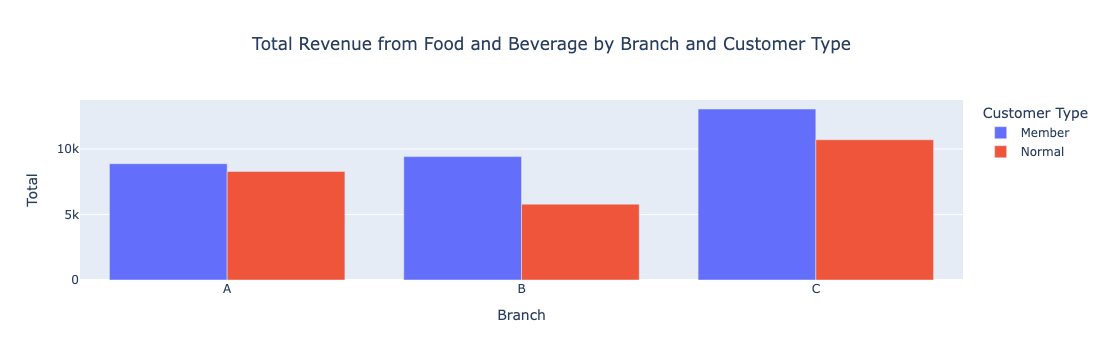

In [272]:
#Visualise total food and beverage data by branch and customer type

fig8 = px.bar(revenue, x="Branch", y="Total", color="Customer_type", barmode="group", labels = {
    "Customer_type" : "Customer Type"}, title = "Total Revenue from Food and Beverage by Branch and Customer Type")
fig8.update_layout(title_x = 0.5)
fig8.show()